In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading in the csv into a dataframe

In [3]:
df = pd.read_csv('../data/raw/Crop_recommendation.csv')
df.shape

(2200, 8)

### Getting Basic understanding of the dataframe

In [4]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


No missing values and the columns seems to be in the right datatypes

## Exploring the data

In [5]:
# Getting how many unique values are in each column
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Getting the numbers of crops in the dataset

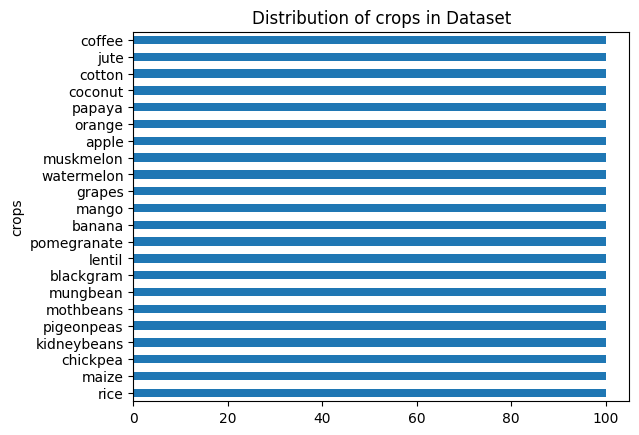

In [7]:
(df['label']
 .value_counts()
 .sort_values(ascending=False)
 .plot(kind='barh', title='Distribution of crops in Dataset', ylabel='crops')
 )
plt.show()

### Checking for outliers

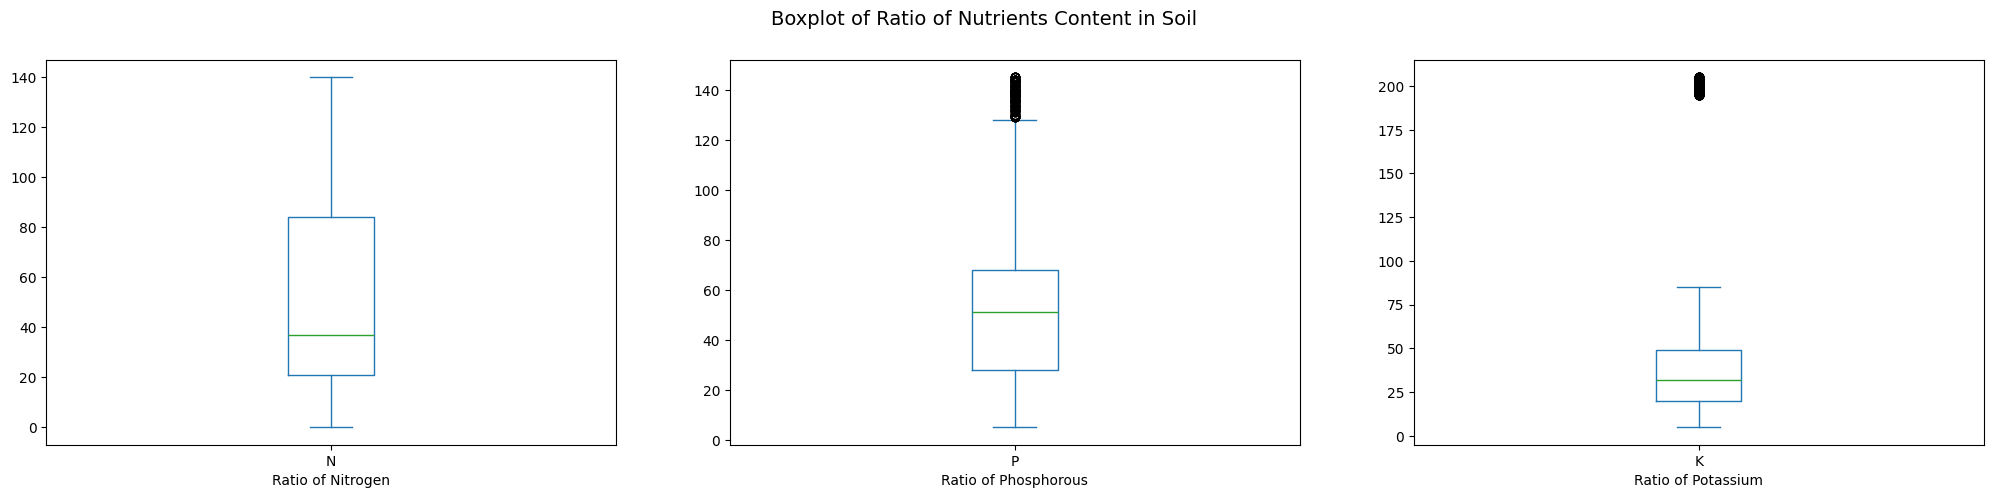

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

df['N'].plot(kind='box',xlabel='Ratio of Nitrogen', ax=axes[0])
df['P'].plot(kind='box',xlabel='Ratio of Phosphorous', ax=axes[1])
df['K'].plot(kind='box',xlabel='Ratio of Potassium', ax=axes[2])


fig.suptitle('Boxplot of Ratio of Nutrients Content in Soil', fontsize=14)

plt.show()

It seems there's a few outlier values in P and K columns

### Removing the outliers

In [9]:
df = df.query('P < 130 & K < 80')

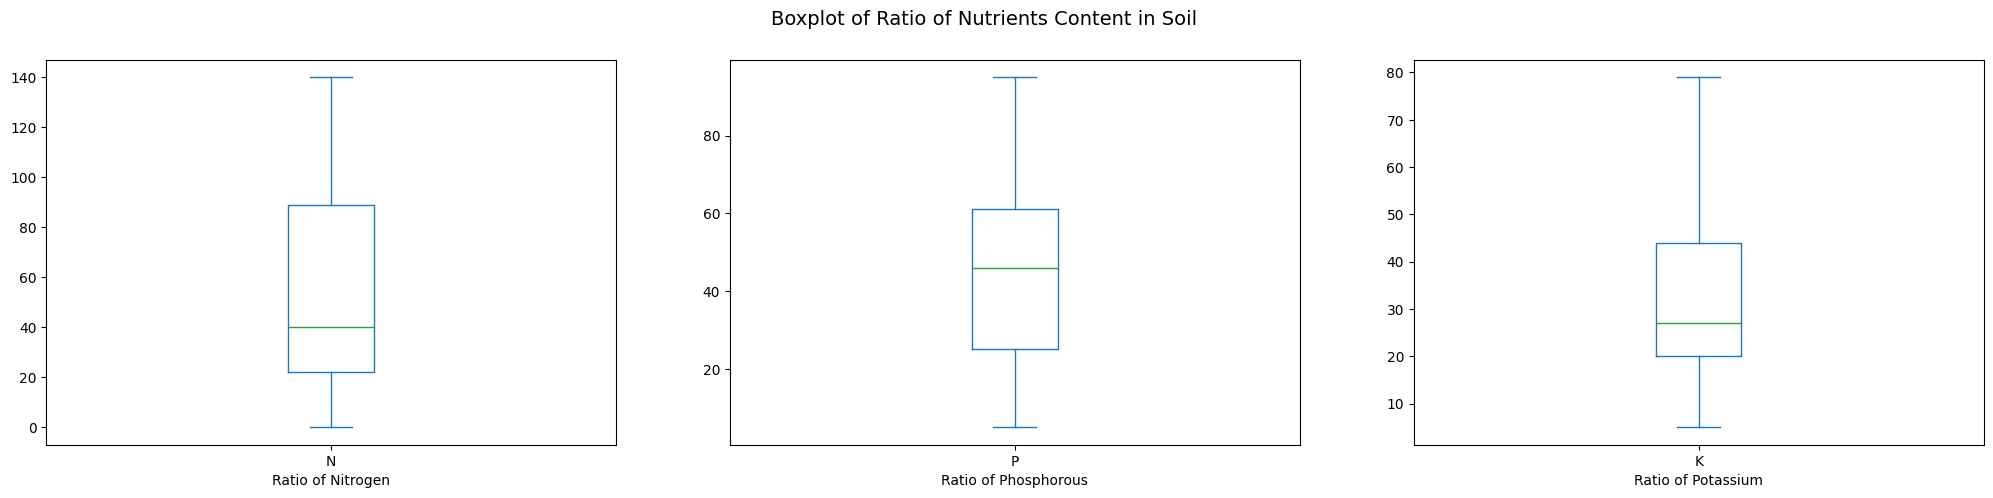

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))

df['N'].plot(kind='box',xlabel='Ratio of Nitrogen', ax=axes[0])
df['P'].plot(kind='box',xlabel='Ratio of Phosphorous', ax=axes[1])
df['K'].plot(kind='box',xlabel='Ratio of Potassium', ax=axes[2])


fig.suptitle('Boxplot of Ratio of Nutrients Content in Soil', fontsize=14)

plt.show()

All outliers removed in the nutrient content columns

### Saving the cleaned dataset

In [11]:
df.to_csv('../data/processed/cleaned_data.csv', index=False)